**Importing Libraries**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Data reading**

In [15]:
df=pd.read_csv("/kaggle/input/udemy-course/UdemyCoursesDataset.csv")

**Info show**

In [16]:
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


**View Details**

In [18]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [19]:
df.describe(include="object")

,course_title,price,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,38,4,109,3676,4
top,Acoustic Blues Guitar Lessons,20,All Levels,1 hour,2014-04-15T21:48:55Z,Web Development
freq,3,830,1932,607,2,1200


**Check nulls**

In [20]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

**Data Transformation**

In [28]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [29]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [31]:
df["month"] = df["published_timestamp"].dt.month
df["year"] = df["published_timestamp"].dt.year

In [32]:
df['content_duration'] = df['content_duration'].str.extract('(\d+\.?\d*)').astype(float)

In [33]:
df['price'] = pd.to_numeric(df['price'].replace('Free', 0))

In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   float64            
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
 11  month                3682 non-null   int32              
 12  year                

**Check Dublicated**

In [35]:
df.duplicated().sum()

6

In [36]:

df.drop(columns=['course_id'], inplace=True)

In [37]:
df.shape

(3682, 12)

In [38]:

df['is_paid'].value_counts()

is_paid
True     3372
False     310
Name: count, dtype: int64

In [39]:

df['level'].value_counts()

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [40]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

**EDA and Visualization**

1. **HeatMap**

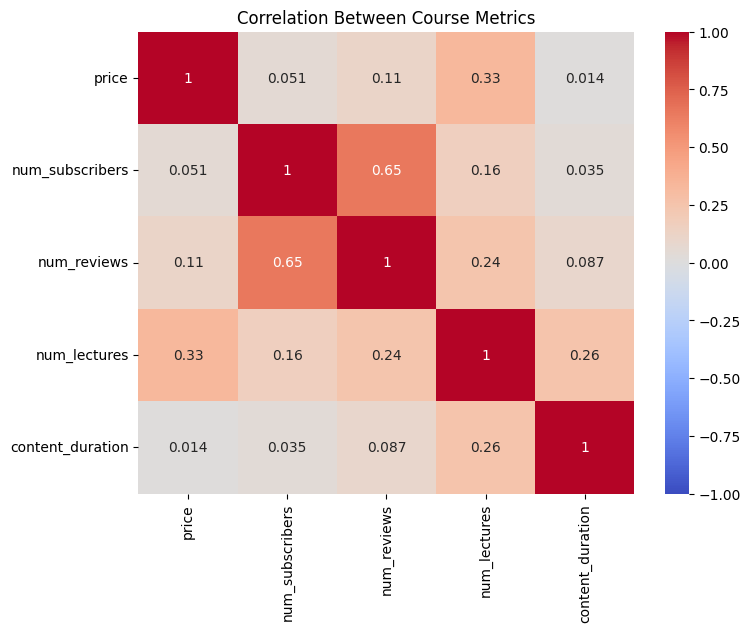

In [41]:
corr = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Course Metrics')
plt.show()

**Number of paid and free courses**

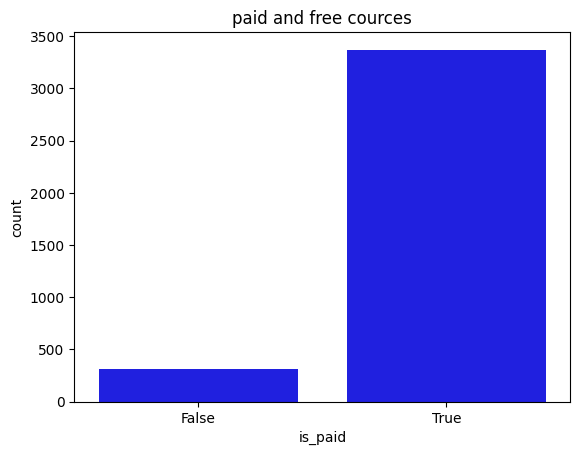

In [42]:
sns.countplot(x='is_paid',data=df,color='b')
plt.title("paid and free cources")
plt.show()

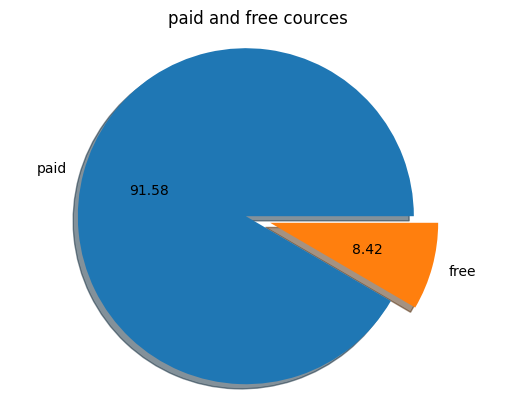

In [43]:
plt.pie(df['is_paid'].value_counts(),labels=('paid','free'),autopct='%1.2f',shadow=True,explode=[0,0.15])
plt.title("paid and free cources")
plt.axis('equal')
plt.show()

**Relation between paid courses and number of subscribers**

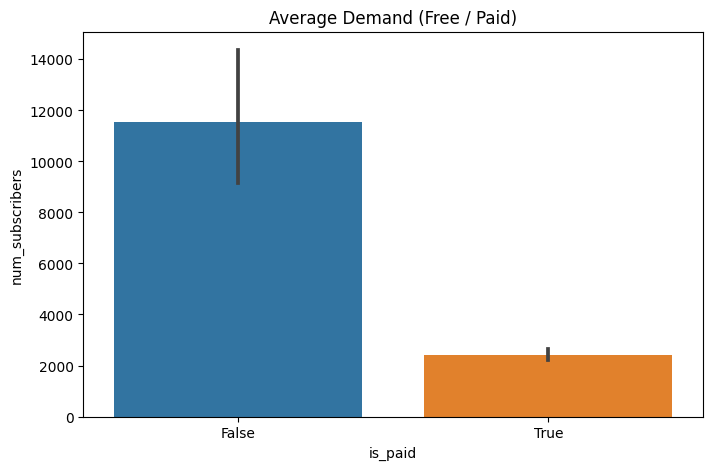

In [44]:
plt.figure(figsize=(8,5))
plt.title("Average Demand (Free / Paid)")
sns.barplot(x="is_paid", y="num_subscribers", data=df)
plt.show()


**Number of cources in each subject**

<Axes: xlabel='subject', ylabel='count'>

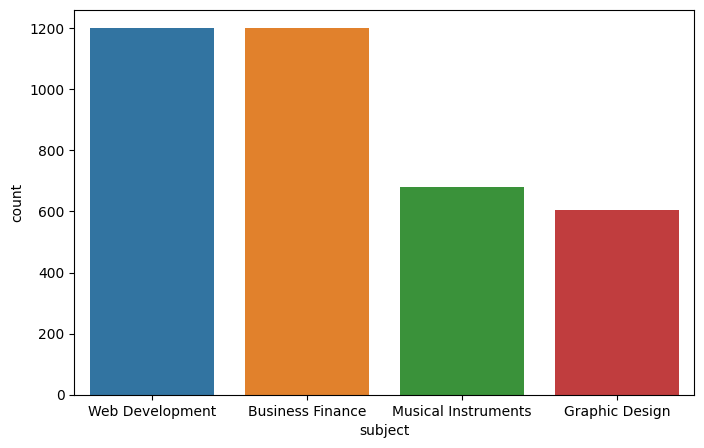

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='subject',order=df.subject.value_counts().index)

<function matplotlib.pyplot.show(close=None, block=None)>

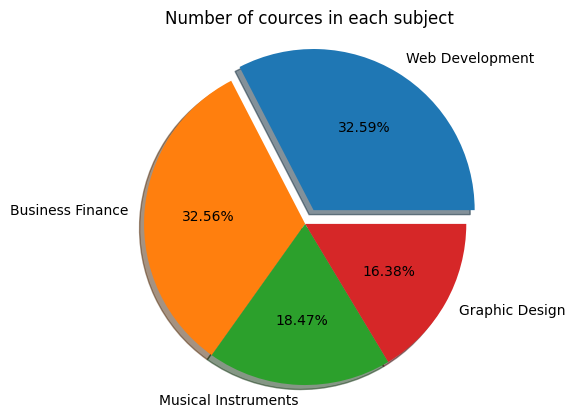

In [46]:
plt.pie(df['subject'].value_counts(),labels=df['subject'].value_counts().index,autopct='%1.2f%%',shadow=True,explode=[0.1,0,0,0])
plt.title("Number of cources in each subject")
plt.axis('equal')
plt.show

**Which subject has the max number of Subscribers**

<Axes: title={'center': 'Average Demand by course subjects'}, xlabel='subject', ylabel='num_subscribers'>

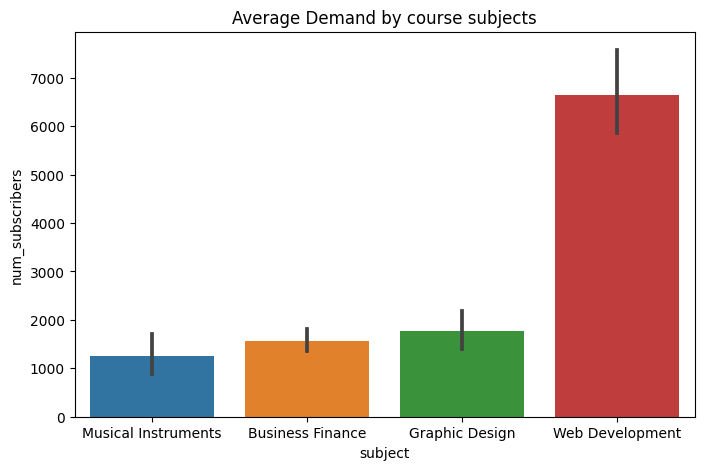

In [47]:
plt.figure(figsize=(8,5))
plt.title('Average Demand by course subjects')
sns.barplot(x='subject',y='num_subscribers',data=df)

<Axes: title={'center': 'Average Demand by course subjects'}, xlabel='subject', ylabel='num_subscribers'>

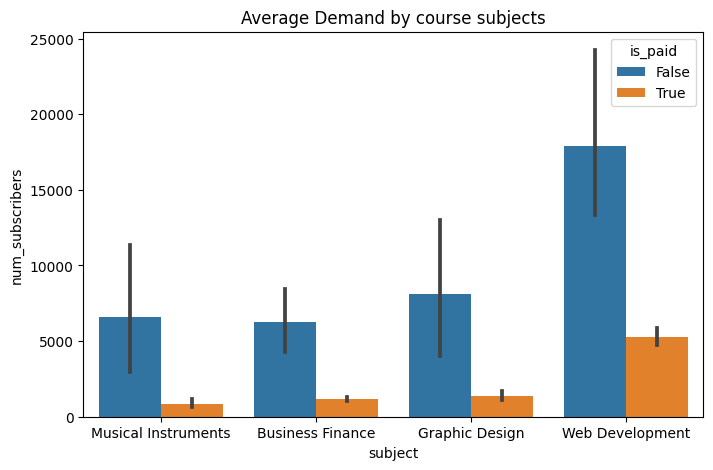

In [49]:
plt.figure(figsize=(8,5))
plt.title('Average Demand by course subjects')
sns.barplot(x='subject',y='num_subscribers',hue='is_paid',data=df)

**Number of courses in each level**

<Axes: xlabel='level', ylabel='count'>

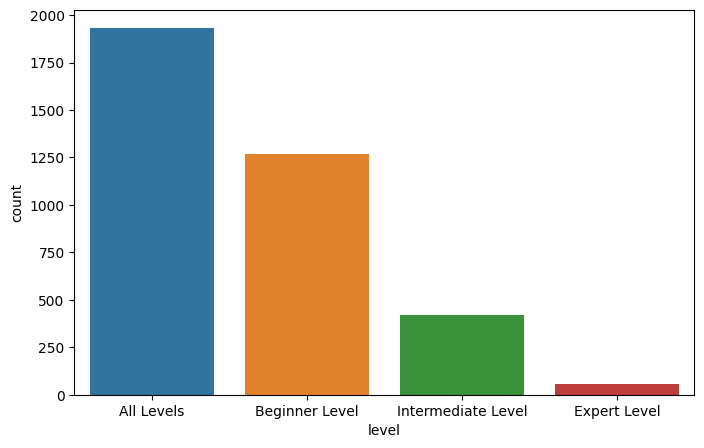

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='level',order=df.level.value_counts().index)

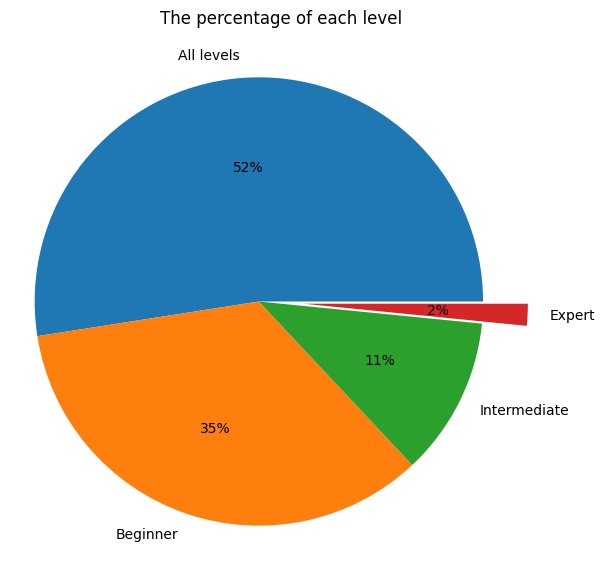

In [51]:
plt.figure(figsize=(7,7))
plt.pie(df.level.value_counts(),labels=['All levels','Beginner','Intermediate','Expert'],explode=[0,0,0,0.2],autopct='%1.f%%')
plt.title("The percentage of each level")
plt.axis('equal')
plt.show()

**Distributin of course price**

<function matplotlib.pyplot.show(close=None, block=None)>

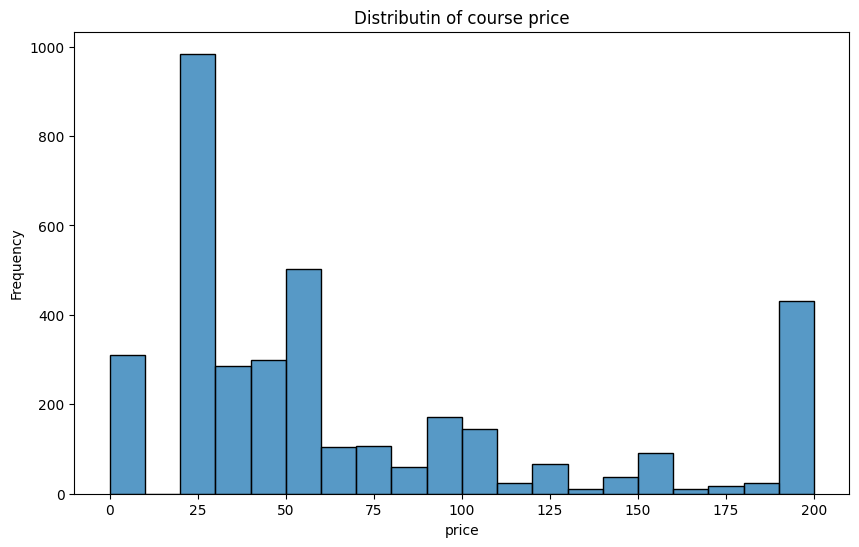

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',bins=20)
plt.title("Distributin of course price")
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show

**Relation between price and number of subscribers**

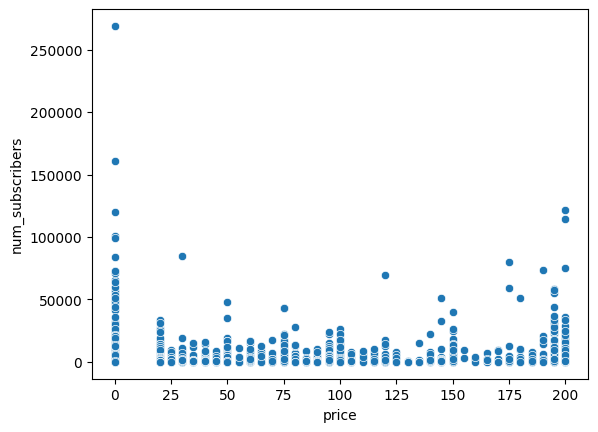

In [53]:
sns.scatterplot(x='price',y='num_subscribers',data=df)
plt.show()

**Which courses duration and number of lectures does subscribers prefer?**

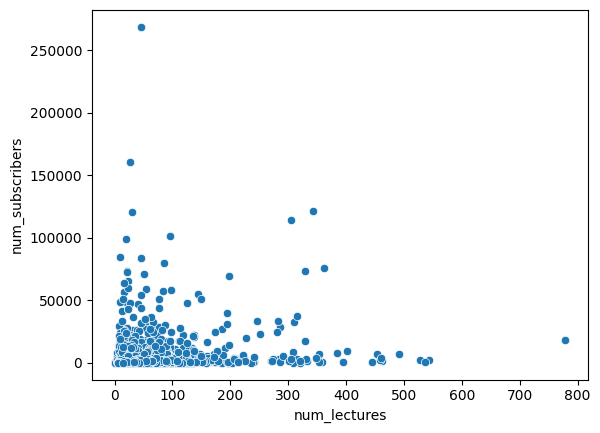

In [54]:
sns.scatterplot(x='num_lectures',y='num_subscribers',data=df)
plt.show()

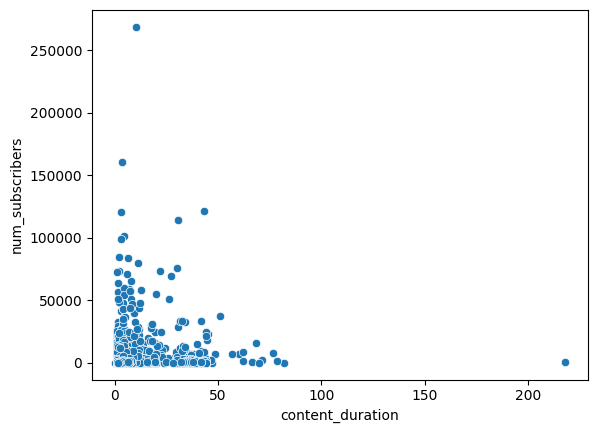

In [55]:
sns.scatterplot(x='content_duration',y='num_subscribers',data=df)
plt.show()

**Total price of courses over the years**

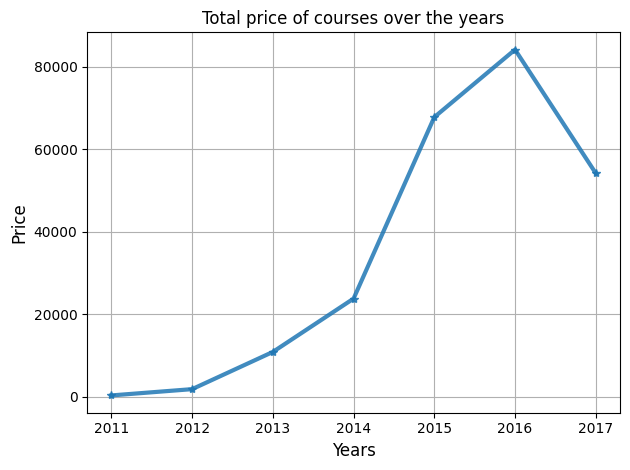

In [59]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year

# تحويل السعر لأرقام
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# تجميع الأسعار حسب السنة
grouped = df.groupby('year')['price'].sum()

# الرسم البياني
plt.plot(grouped.index, grouped.values, marker='*', lw=3, alpha=0.85)
plt.title('Total price of courses over the years', size=12)
plt.xlabel('Years', color='k', size=12)
plt.ylabel('Price', color='k', size=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Distribution of courses Published Over Month**

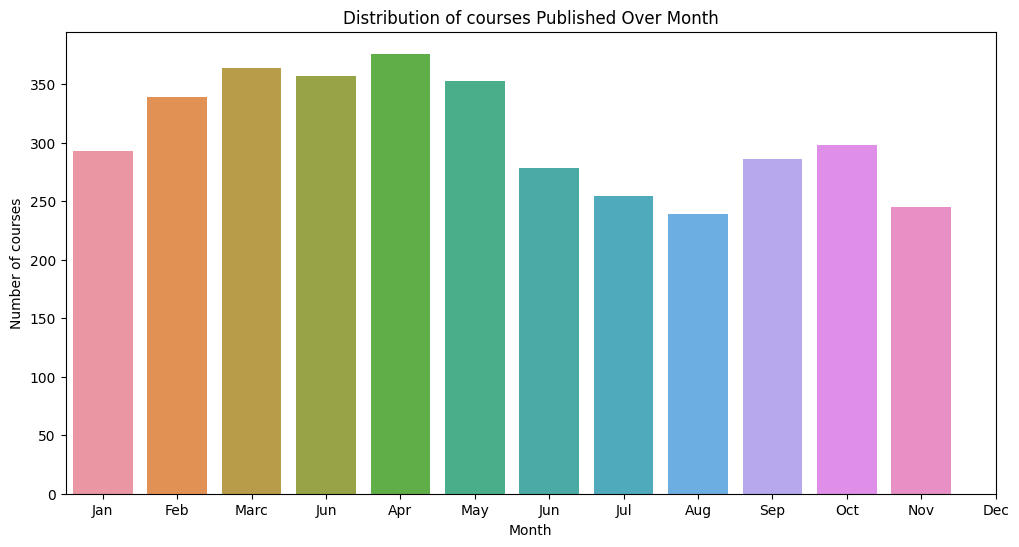

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='month')
plt.title('Distribution of courses Published Over Month')
plt.xlabel('Month')
plt.ylabel('Number of courses')
plt.xticks(range(0,13),['Jan','Feb','Marc','Jun','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

**What is The most 5 Courses that have high Subscribers**

<Figure size 800x500 with 0 Axes>

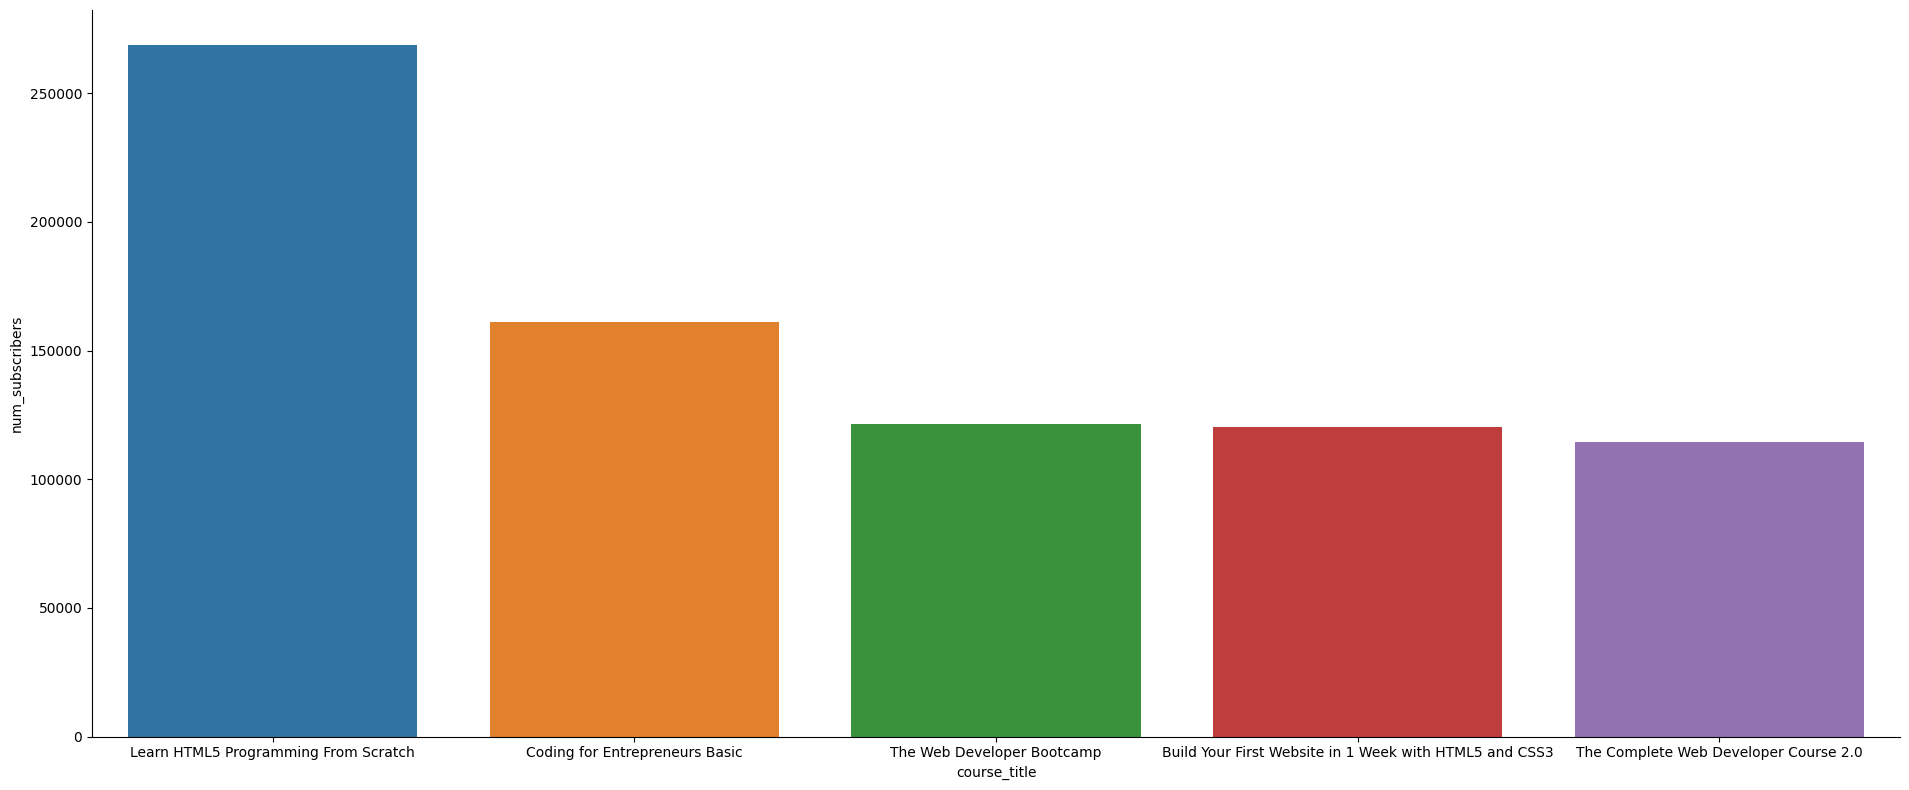

In [64]:
plt.figure(figsize=(8,5))
z=df.loc[df.num_subscribers.sort_values(ascending=False).head().index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.4,x='course_title',y='num_subscribers')
plt.show()

**What is The most 5 Courses that have high reviews**

<Figure size 800x500 with 0 Axes>

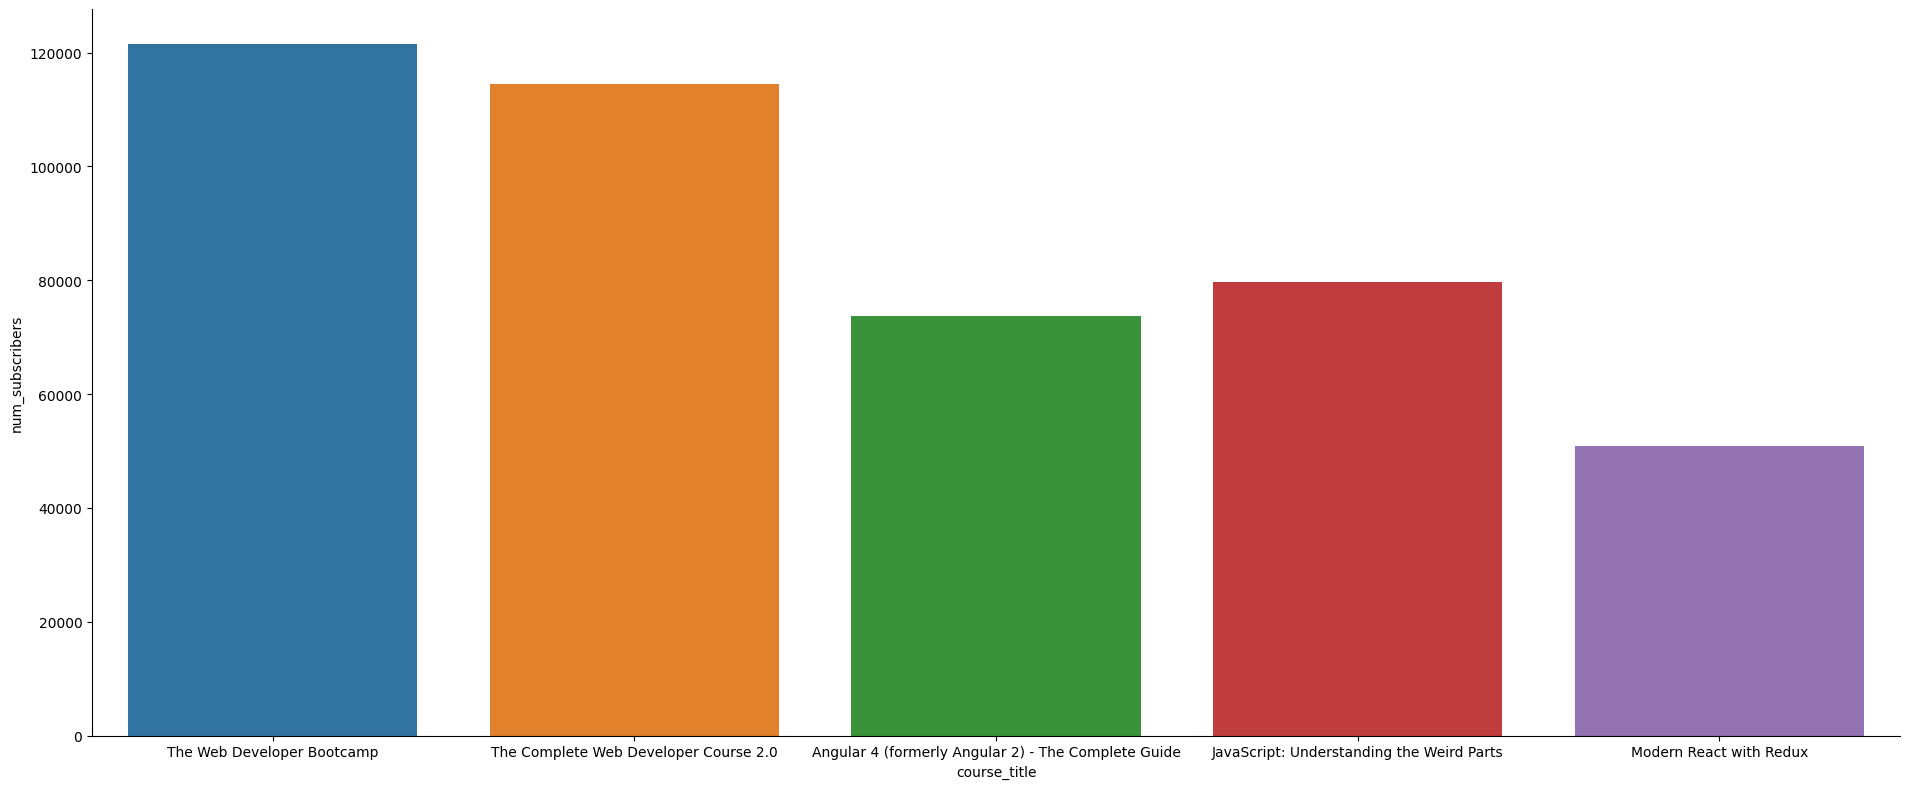

In [65]:
plt.figure(figsize=(8,5))
z=df.loc[df.num_reviews.sort_values(ascending=False).head().index]
sns.catplot(data=z,kind='bar',height=8,aspect=2.4,x='course_title',y='num_subscribers')
plt.show()

**Top 20 courses that have high price**

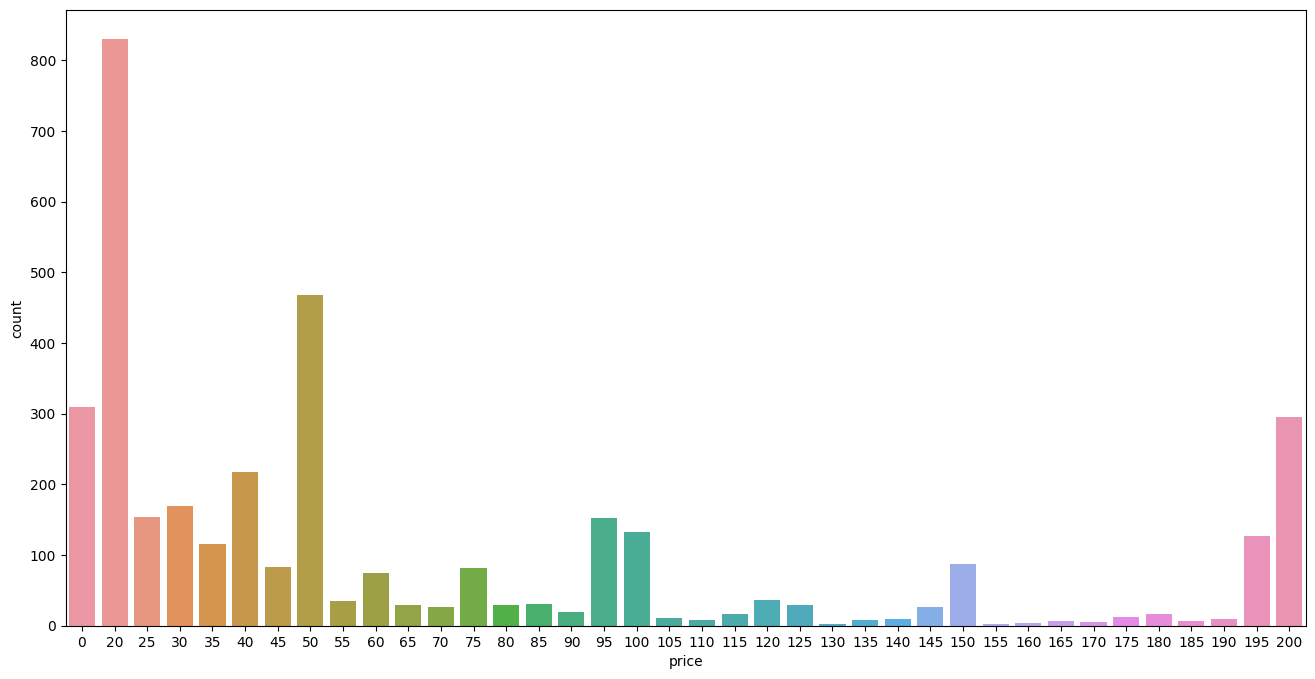

In [67]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='price')
plt.show()

**Average Duration (hours)**

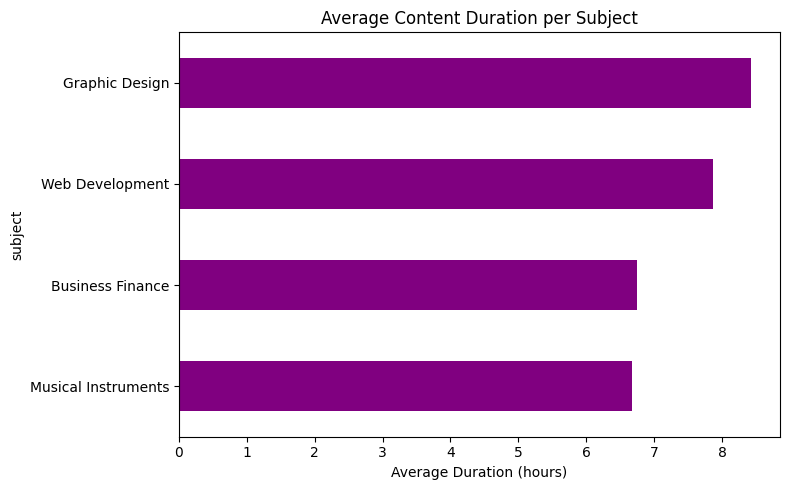

In [72]:
df.groupby('subject')['content_duration'].mean().sort_values().plot(
    kind='barh', figsize=(8,5), color='purple', title='Average Content Duration per Subject')
plt.xlabel('Average Duration (hours)')
plt.tight_layout()
plt.show()


**Average Price of Paid Courses per Subject**

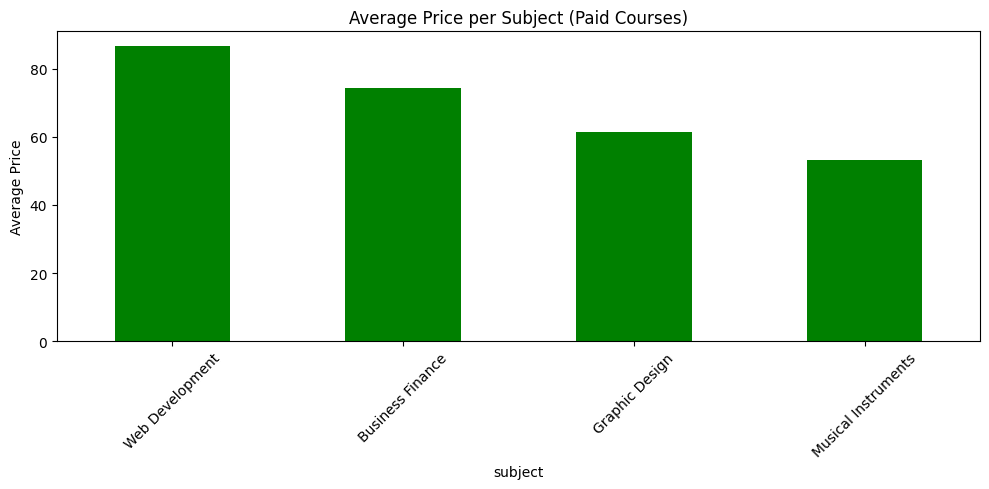

In [73]:
paid_courses = df[df['is_paid'] == True]
avg_price = paid_courses.groupby('subject')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', figsize=(10,5), color='green', title='Average Price per Subject (Paid Courses)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
